In [1]:
!pip install plotly pillow


DEPRECATION: Loading egg at /Users/sefunmibodun/anaconda3/envs/dami/lib/python3.12/site-packages/PyMOL_PUB-1.1-py3.12.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330


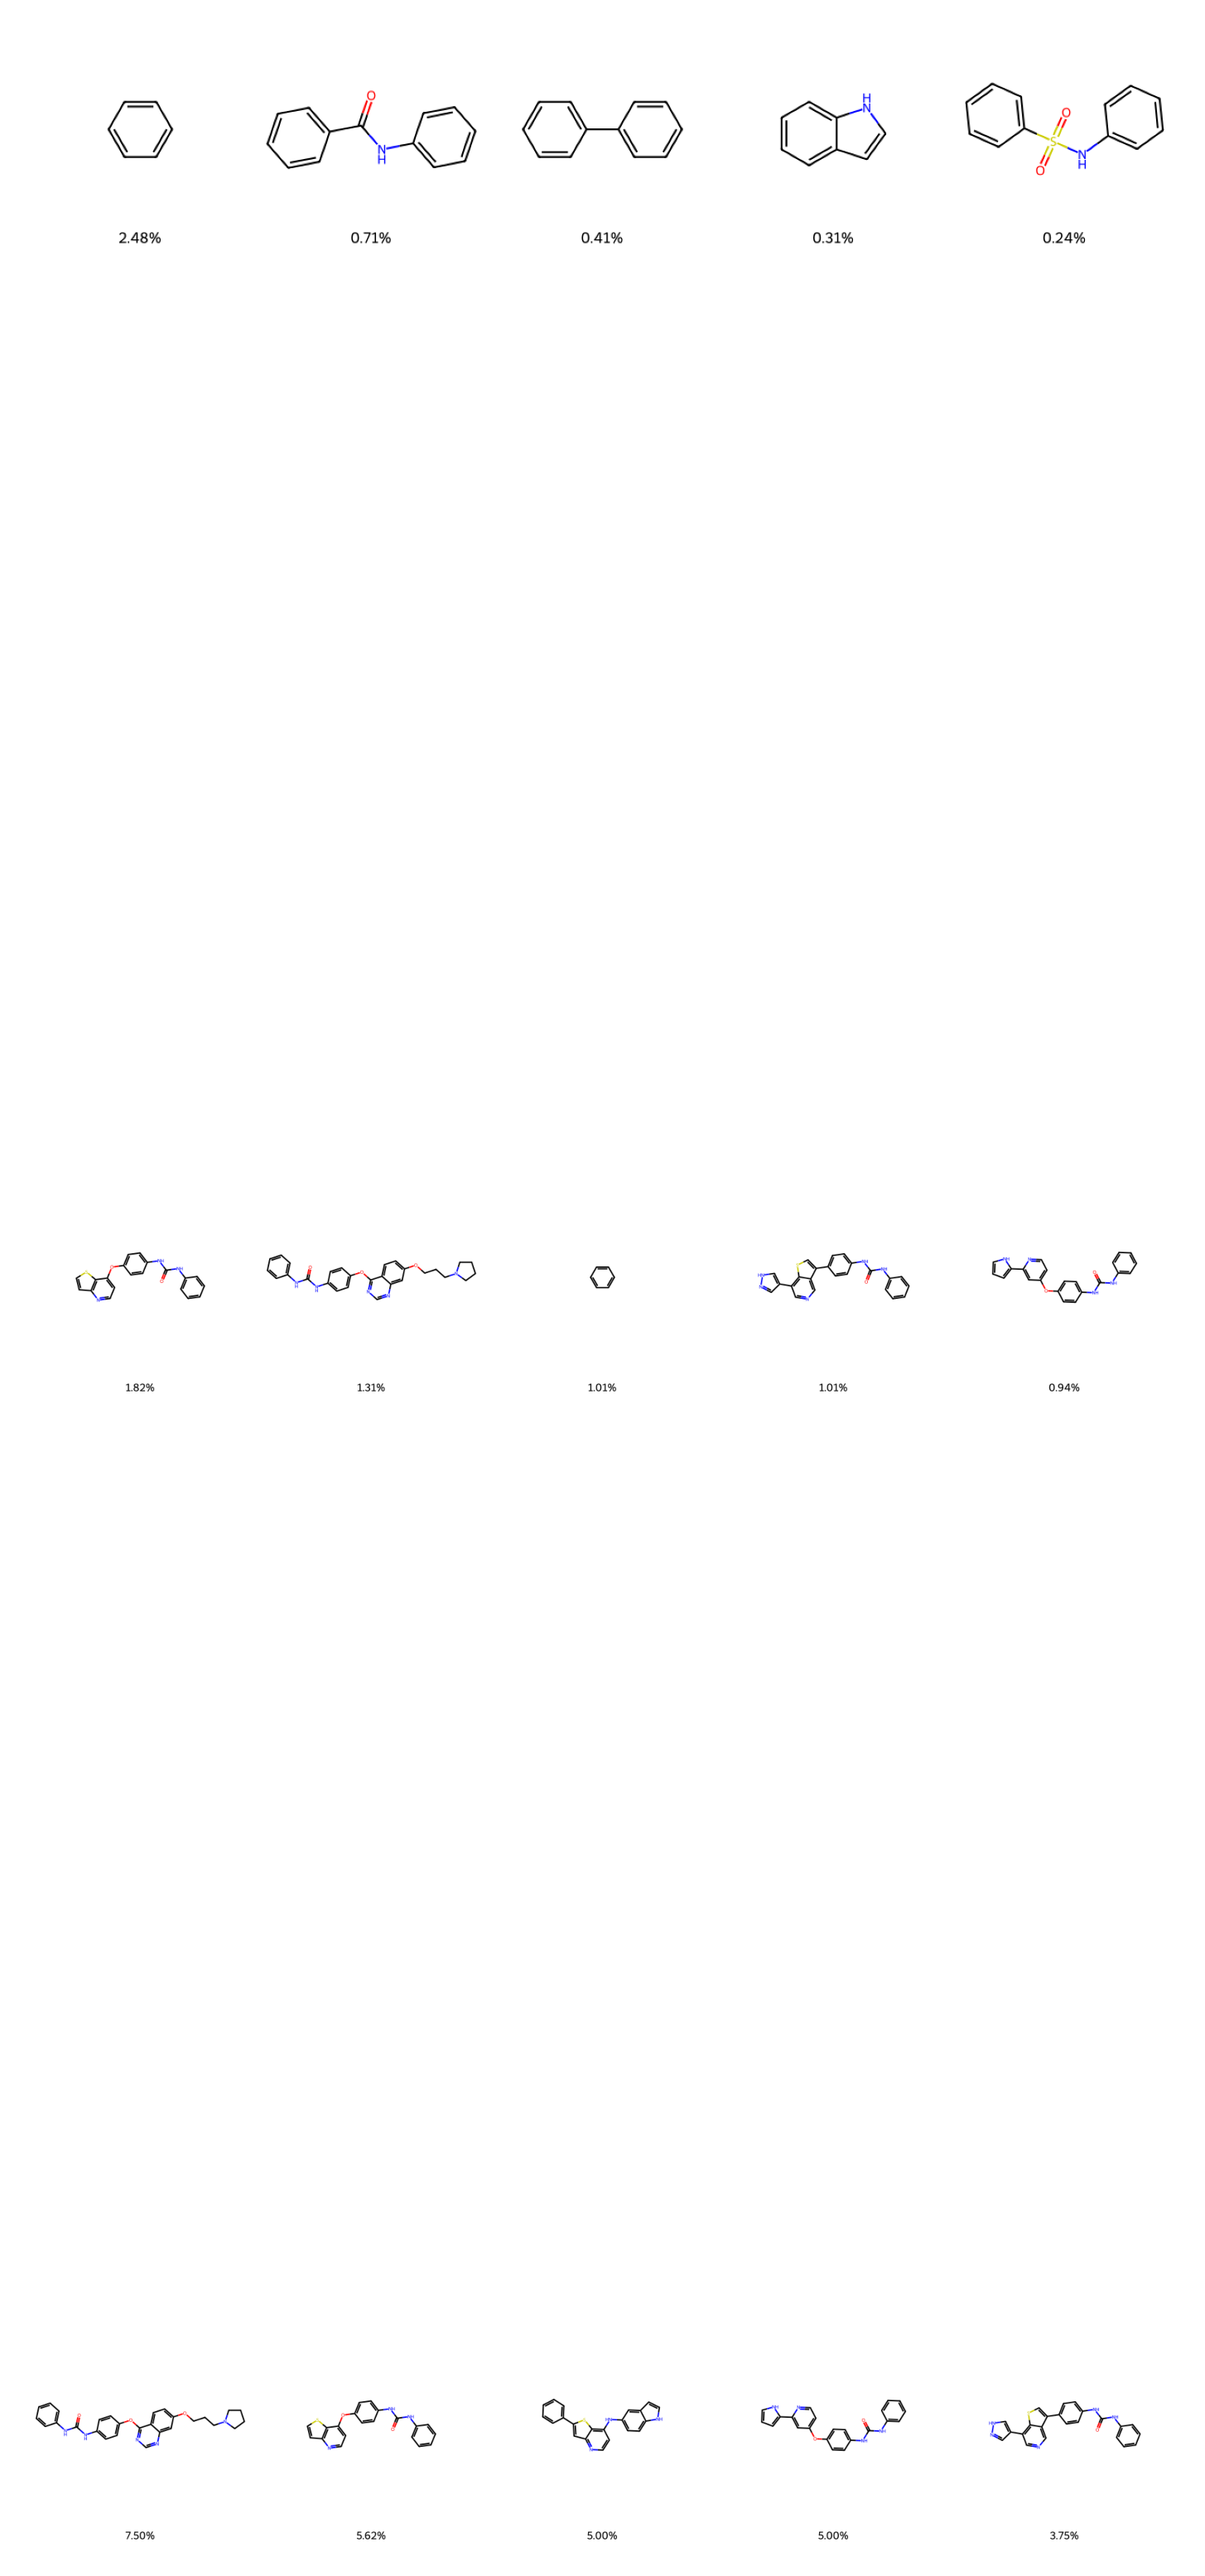

In [11]:
import matplotlib.pyplot as plt
from PIL import Image

# Paths to your 3 local images
image_paths = ["prior_murcko.png", "finetuned_murcko.png", "Reference_murcko.png"]

# Load images
images = [Image.open(img_path) for img_path in image_paths]

# Set figure size based on image dimensions (you can adjust this)
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(6, 18), dpi=300)  # width, height in inches

# Plot each image in a row
for ax, img in zip(axes, images):
    ax.imshow(img)
    ax.axis('off')  # Hide axis ticks and labels
    

plt.subplots_adjust(wspace=0, hspace=0) 
plt.show()


In [31]:
from PIL import Image, ImageDraw, ImageFont

# Paths to your images and corresponding labels
image_paths = ["prior_murcko.png", "finetuned_murcko.png", "Reference_murcko.png"]
labels = ["     Prior", "Finetuned", "Reference"]

# Load images
images = [Image.open(path) for path in image_paths]

# Get maximum width
max_width = max(img.width for img in images)

# Try to load a larger TTF font; fallback if unavailable
try:
    font = ImageFont.truetype("arial.ttf", size=60)  # Increased font size
except:
    font = ImageFont.load_default(size=20)

# Resize and label each image
resized_images = []
for img, label in zip(images, labels):
    if img.width != max_width:
        aspect_ratio = img.height / img.width
        new_height = int(max_width * aspect_ratio)
        img = img.resize((max_width, new_height), Image.LANCZOS)

    # Draw label
    draw = ImageDraw.Draw(img)
    draw.text((20, 20), label, font=font, fill="black")  # Adjusted position slightly
    resized_images.append(img)

# Combine images vertically
total_height = sum(img.height for img in resized_images)
combined_image = Image.new("RGB", (max_width, total_height))

y_offset = 0
for img in resized_images:
    combined_image.paste(img, (0, y_offset))
    y_offset += img.height

# Show or save the result
combined_image
combined_image.save("combined_murcko.png", dpi=(300, 300))


#combine 4 images
labels = [a, b, c, d]
2 rows * 2 columns


In [1]:
from PIL import Image, ImageDraw, ImageFont

# Paths to your 4 images
image_paths = ["combined_murcko.png", "similarity.png", "nll.png", "scatter.png"]
labels = ["a", "b", "c", "d"]

# Load and optionally resize images to same size
images = [Image.open(path) for path in image_paths]
width, height = images[0].size  # use first image as reference

# Resize all images to match the first
resized_images = [img.resize((width, height), Image.LANCZOS) for img in images]

# Load font
try:
    font = ImageFont.truetype("arial.ttf", size=48)
except:
    font = ImageFont.load_default(size= 23)

# Add labels to each image
for img, label in zip(resized_images, labels):
    draw = ImageDraw.Draw(img)
    draw.text((20, 20), label, font=font, fill="black")

# Create a new blank canvas for 2x2 grid
grid_width = width * 2
grid_height = height * 2
combined_image = Image.new("RGB", (grid_width, grid_height))

# Paste each image into the grid
positions = [(0, 0), (width, 0), (0, height), (width, height)]
for img, pos in zip(resized_images, positions):
    combined_image.paste(img, pos)

# Show and save the result
combined_image
combined_image.save("combined_2x2_labeled.png", dpi=(300, 300))


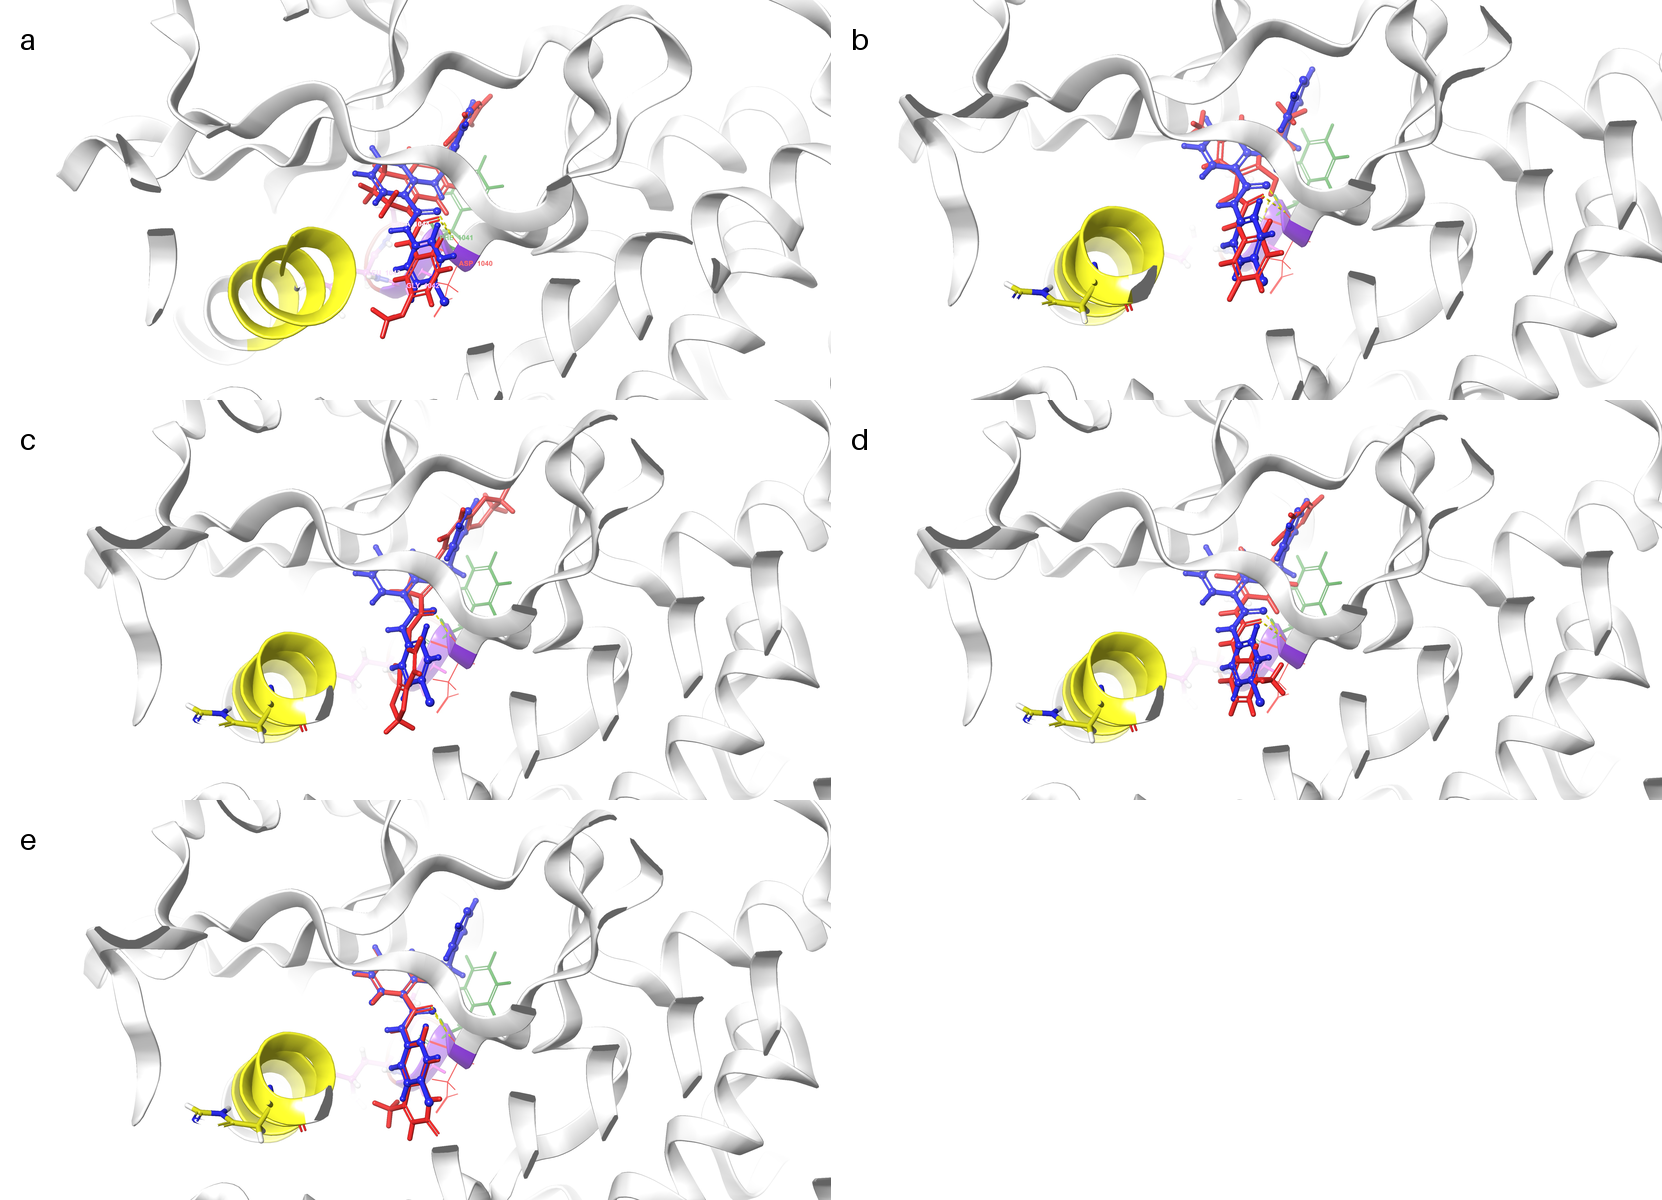

In [10]:
from PIL import Image, ImageDraw, ImageFont

# Paths and labels
image_paths = ["136.jpg", "337.jpg", "52.jpg", "191.jpg", "202.jpg"]
labels = ["a", "b", "c", "d", "e"]

# Load images
images = [Image.open(path) for path in image_paths]

# Resize all images to same fixed height while preserving aspect ratio
target_height = 400
resized_images = []
for img in images:
    aspect_ratio = img.width / img.height
    new_width = int(aspect_ratio * target_height)
    resized_img = img.resize((new_width, target_height), Image.LANCZOS)
    resized_images.append(resized_img)

# Standardize width and height to ensure uniform grid cells
cell_width = max(img.width for img in resized_images)
cell_height = target_height

# Pad images to match max width (so they align cleanly in grid)
for i in range(len(resized_images)):
    img = resized_images[i]
    if img.width < cell_width:
        padded_img = Image.new("RGB", (cell_width, cell_height), color="white")
        padded_img.paste(img, ((cell_width - img.width) // 2, 0))
        resized_images[i] = padded_img

# Load font
try:
    font = ImageFont.truetype("arial.ttf", size=36)
except:
    font = ImageFont.load_default(size=30)

# Add labels
for img, label in zip(resized_images, labels):
    draw = ImageDraw.Draw(img)
    draw.text((20, 20), label, font=font, fill="black")

# Create a 2x3 grid canvas
cols = 2
rows = 3
grid_width = cell_width * cols
grid_height = cell_height * rows
combined_image = Image.new("RGB", (grid_width, grid_height), color="white")

# Paste images into grid
positions = [(x * cell_width, y * cell_height) for y in range(rows) for x in range(cols)]

for img, pos in zip(resized_images, positions):
    combined_image.paste(img, pos)

# Show or save
# combined_image.save("combined_2x3_labeled.png", dpi=(300, 300))
combined_image
